In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time
import matplotlib.pyplot as plt

import numpy as np

import denoise
import noise_estimator
import util_plot
#import caiman as cm

In [2]:
from skimage import io
mov = io.imread('example_movies/demoMovie.tif').transpose([1,2,0])
print(mov.shape)

(60, 80, 2000)


In [3]:
mov_wf = denoise.spatial(mov, gHalf=[2,2])

first 0/4800 pixels
first 1000/4800 pixels
first 2000/4800 pixels
first 3000/4800 pixels
first 4000/4800 pixels


In [4]:
noise_level = denoise.noise_level(mov_wf,
                                  range_ff=[0.25,0.5])
mov_nn = mov_wf/noise_level[:,:,np.newaxis]

In [5]:
# spatially decimate


In [ ]:
#from l1_trend_filter.l1_tf_C.c_l1_tf import l1_tf# cython


In [6]:
data_all = mov_nn[:6,:8,:]

In [7]:
# debug
data = data_all.copy()
# Remove the mean
mu = data.mean(0, keepdims=True)
data = data - mu
data0=data.copy()

In [12]:
import greedyPCA as gpca
import greedyPCA_raw as gpca_raw

confidence=0.999
corr=True
iterate=False
kurto=False
maxlag=3
mean_th=None
mean_th_factor=1.5
stim_knots=None
stim_delta=200
verbose=True

Initialize iterations with 4 components
solve V(i) = argmin_W ||D^2 W||_1 
	 st ||V_i-W||_2<fudge_factor*sigma_i*sqrt(T)
Max number of greedy loops: 20 (relative convergence)
U = Y*pinv(V)
*Iteration 0 part (1) with 4 components
solve V(i)
noise
[0.00713913 0.0143656  0.01852014 0.01749269]
Noise range is 7.139e-03 1.852e-02
719
lambda
[0.04809092 0.22629114 0.31406597 0.43342111]
solve U(j)
740
[4063.29926919 4449.68615379 4367.70700676 5316.4370281 ]
Iteration 0: begin greedy loops
	Iteration 0 loop 0 with 4 components
	update V_i in closed form
537
lambda
0.048090917374814184
1162
0.048090917374814184
0.03551441905300595
537
lambda
0.22629113681329552
1162
0.22629113681329552
0.09770185532878993
537
lambda
0.31406597129429975
1162
0.31406597129429975
0.032376953857613355
537
lambda
0.43342111037535536
1162
0.43342111037535536
0.08941312742722748
Noise
None
[4063.29926919 4449.68615379 4367.70700676 5316.4370281 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

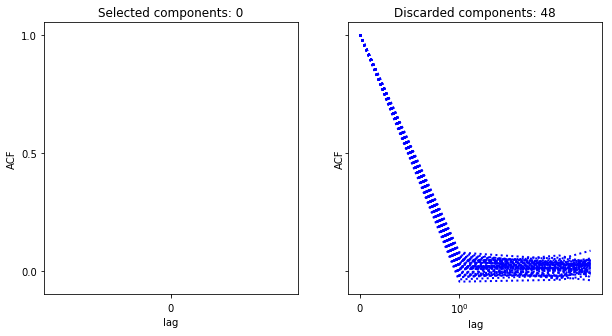

Final number of components 4
Running final update after 0 iterations
	solve V(j)
Solve V_[0])
noise
[0.00430217]
Noise range is 4.302e-03 4.302e-03
533
Solve V_[1])
noise
[0.00437679]
Noise range is 4.377e-03 4.377e-03
533
Solve V_[2])
noise
[0.00207328]
Noise range is 2.073e-03 2.073e-03
533
Solve V_[3])
noise
[0.0032476]
Noise range is 3.248e-03 3.248e-03
533
	solve U(j)
	Regress for V(j)


In [71]:
plot_en = False
decimation_flag=False
verbose = True
tsub = 1
ds = 1

Y,vt2 = gpca_raw.denoise_components(data_all,
                                tsub=tsub,
                                ds = ds,
                                confidence=confidence,
                                corr=corr,
                                iterate=iterate,
                                kurto=kurto,
                                maxlag=maxlag,
                                mean_th=mean_th,
                                mean_th_factor=mean_th_factor,
                                plot_en=plot_en,
                                verbose=verbose
                                )

1110
0.42252939890110686


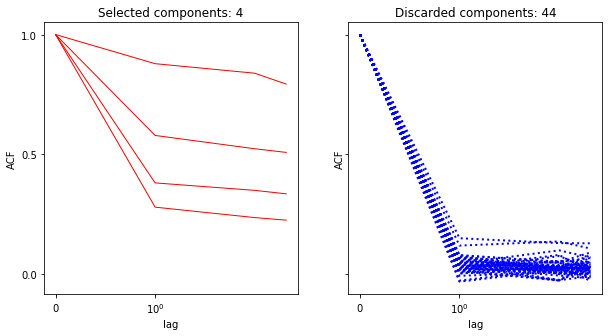

Initialization with 4 components
solve V(i) = argmin_W ||D^2 W||_1 
	 st ||V_i-W||_2<fudge_factor*sigma_i*sqrt(T)
Max # of greedy loops: 20 (relative convergence)
solve U = Y*pinv(V)
*Iteration 0: initialization 4 components
solve V(i)
noise
[0.00713913 0.0143656  0.01852014 0.01749269]
Noise range is 7.139e-03 1.852e-02
lambda
[0.04809092 0.22629114 0.31406597 0.43342111]
908
[4063.29926919 4449.68615379 4367.70700676 5316.4370281 ]
Iteration 0: begin greedy loops
	Iteration 0 loop 0 with 4 components
	update V_i in closed form
727
lambdas_
0.048090917374814184
1515
0.048090917374814184
0.03551431262805088
727
lambdas_
0.22629113681329552
1515
0.22629113681329552
0.09770233400965622
727
lambdas_
0.31406597129429975
1515
0.31406597129429975
0.032377032285887924
727
lambdas_
0.43342111037535536
1515
0.43342111037535536
0.08941268130243295
Noise
None
[4063.29926919 4449.68615379 4367.70700676 5316.4370281 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0

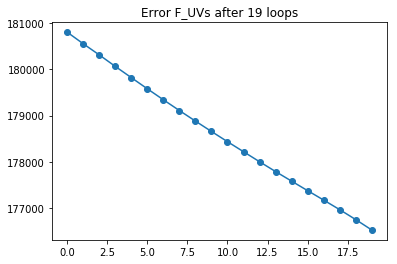

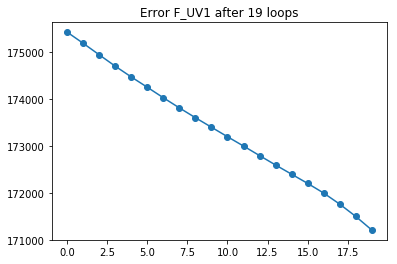

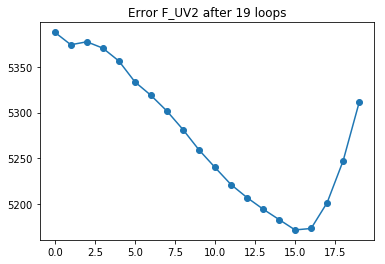

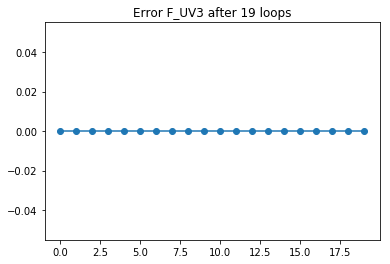

*Iteration 0 residual search with 4 components
1110
0.3239392058241819


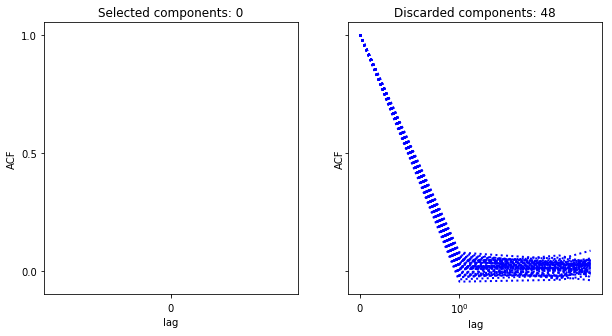

Final number of components 4
*Final update after 0 iterations
	Final update of temporal components
Noise range is 4.302e-03 4.302e-03
713
None
Noise range is 4.377e-03 4.377e-03
713
None
Noise range is 2.074e-03 2.074e-03
713
None
Noise range is 3.248e-03 3.248e-03
713
None
	Final update of spatial components
	Final regression for V(j)


In [79]:
plot_en = False
decimation_flag=False
verbose = True
tsub = 1
ds = 1

Y,vt2 = gpca.denoise_components(data_all,
                                tsub=tsub,
                                ds = ds,
                                decimation_flag=decimation_flag,
                                confidence=confidence,
                                corr=corr,
                                iterate=iterate,
                                kurto=kurto,
                                maxlag=maxlag,
                                mean_th=mean_th,
                                mean_th_factor=mean_th_factor,
                                plot_en=plot_en,
                                stim_knots=stim_knots,
                                stim_delta=stim_delta,
                                verbose=verbose
                                )

In [42]:
plot_en = False
decimation_flag=True
verbose = False
tsub = 2
ds = 2

Y,vt2 = gpca.denoise_components(data_all,
                                tsub=tsub,
                                ds = ds,
                                decimation_flag=decimation_flag,
                                confidence=confidence,
                                corr=corr,
                                iterate=iterate,
                                kurto=kurto,
                                maxlag=maxlag,
                                mean_th=mean_th,
                                mean_th_factor=mean_th_factor,
                                plot_en=plot_en,
                                stim_knots=stim_knots,
                                stim_delta=stim_delta,
                                verbose=verbose
                                )

614
noise
[0.00166766 0.00263143 0.00327611 0.00304239]
lambda
[0.00388311 0.00552804 0.00665774 0.00627304]
908
[151.07177723  39.78806113  25.27893224  21.88008188]
727
lambdas_
0.0038831069180650284
727
lambdas_
0.00552804245516639
727
lambdas_
0.006657742422144958
727
lambdas_
0.006273044715075223
939
727
lambdas_
0.003758016203151421
727
lambdas_
0.004901400257241823
727
lambdas_
0.005384394648836069
727
lambdas_
0.005237386958312167
939
727
lambdas_
0.0036372350160207272
727
lambdas_
0.0043665509684092515
727
lambdas_
0.004430720829026378
727
lambdas_
0.004453582387311411
	ERROR: Greedy solving failed, keeping 4 parameters


In [ ]:
# spatially decimate
ds=1
data0_ds = gpca.spatial_decimation(data0,
                        ds=ds,
                        dims=dims)
    
pca_method='vanilla'
U, s, Vt = gpca.compute_svd(data0_ds.T,
                        method=pca_method)

In [ ]:
ctid, mean_th = gpca.find_temporal_component(Vt,
                                    confidence=confidence,
                                    corr=corr,
                                    iterate=iterate,
                                    kurto=kurto,
                                    maxlag=maxlag,
                                    mean_th=mean_th,
                                    mean_th_factor=mean_th_factor,
                                    plot_en=plot_en,
                                    stim_knots=stim_knots,
                                    stim_delta=stim_delta
                                    )
keep1 = np.where(np.logical_or(ctid[0, :] == 1, ctid[1, :] == 1))[0]


In [ ]:
Vt = Vt[keep1,:]
U = U[:,keep1].dot(np.eye(len(keep1))*s[keep1.astype(int)])

V_hat=Vt.copy()

In [ ]:
num_components, T = V_hat.shape


In [ ]:
solver='SCS'
constraint_segmented=False
fudge_factor =1

V_TF,region_indices,lambdas_= gpca.greedy_temporal_denoiser(V_hat,
                                                       solver=solver,
                                                       constraint_segmented=constraint_segmented,
                                                       fudge_factor=fudge_factor,
                                                       verbose=verbose
                                                      )

In [ ]:
U_update = False
U_hat, nus_ = gpca.greedy_spatial_denoiser(Y,
                                      V_TF,
                                      fudge_factor=fudge_factor,
                                      U_update=U_update,
                                      dims=dims,
                                      plot_en=plot_en)

In [ ]:
plt.plot(V_hat[0,:])
plt.plot(V_TF[0,:])

In [ ]:
lambdas_2 = (lambdas_) * (U_hat**2).sum(axis=0)
#lambdas_2 = (U_hat**2).sum(axis=0)/lambdas_

In [ ]:
plot_en=True
V_TF = gpca.iterative_temporal_denoiser(Y,
                                   U_hat,
                                   V_TF,
                                   solver=solver,
                                   lambdas_=lambdas_2,
                                   region_indices=region_indices,
                                   plot_en=plot_en,
                                   verbose=verbose,
                                   constraint_segmented=constraint_segmented,
                                   fudge_factor=fudge_factor)

In [ ]:
#from skimage.transform import downscale_local_mean
#ds = 2
#mov_nn2 = downscale_local_mean(mov_nn, (ds, ds, 1))

In [ ]:
data_all = mov_nn[:10,:10,:]

In [ ]:
data_all.shape

In [ ]:
from l1_trend_filter.l1_tf_C.c_l1_tf import l1_tf

In [ ]:
def l1_tf(double[::1] data_,
          double lambda_,
          bool max_lambda,
          int MAXITER,
          int verbose):

In [ ]:
if data_all.ndim == 3:
    dims = data_all.shape # d1 x d2 x T
    data_all = data_all.reshape((np.prod(dims[:2]),dims[2]), order='F')
data_all = data_all.T.astype('float32')

In [ ]:

keep1 = gpca.find_temporal_component(Vt,
                                    confidence=confidence,
                                    corr=corr,
                                    iterate=iterate,
                                    kurto=kurto,
                                    maxlag=maxlag,
                                    mean_th=mean_th,
                                    mean_th_factor=mean_th_factor,
                                    plot_en=plot_en,
                                    stim_knots=stim_knots,
                                    stim_delta=stim_delta
                                    )
 

In [ ]:
U_2, Vt_2 = gpca.decimation_interpolation(data0_ds.T,
                            dims=dims,
                            ds=ds,
                            tsub=tsub,
                            rank=len(keep1)
                            )

In [ ]:
U[:,keep1].dot(np.diag(s[keep1])).shape

In [ ]:
U_2[:,:,im].shape

In [ ]:
for im in range(len(keep1)):
    plt.imshow(U_2[:,:,im])
    plt.show()

In [ ]:
for im in range(len(keep1)):
    plt.imshow(U_2[:,:,im])
    plt.show()

In [ ]:
x_interp=np.linspace(0,dims[2],dims[2])

In [ ]:
xp_ = x_interp[::tsub]

In [ ]:
Vt_2.shape

In [ ]:
yp_ = Vt_2[0,:]

In [ ]:
plt.plot(yp_)

In [ ]:
plt.plot(np.interp(x_interp,xp_,yp_))

In [ ]:
import greedyPCA as gpca
ds=2
data0_ds = gpca.spatial_decimation(data0,
                        ds=ds,
                        dims=dims)

In [ ]:
plt.imshow(util_plot.local_correlations_fft(mov_nn))

In [ ]:
plt.imshow(util_plot.local_correlations_fft(mov_nn2))

In [ ]:
mov_nn2.shape

In [ ]:
mov_nn2.reshape()